In [53]:
# we will import some libray for K_mean for segmantion image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import  io, color, morphology, measure, segmentation


# K-means Algorithm For Image

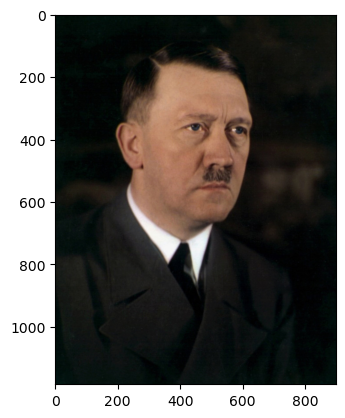

In [26]:
image = cv2.imread('hitler.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)


In [27]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)


Taking k = 4, which means that the algorithm will identify 4 clusters in the image.

In [28]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

k= 4

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)


In [29]:
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))


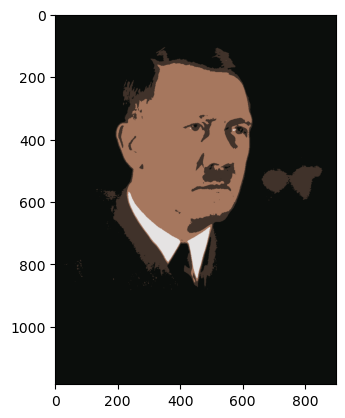

In [30]:
plt.imshow(segmented_image)


# Edge based segmentation 


## 1- canny edge detection


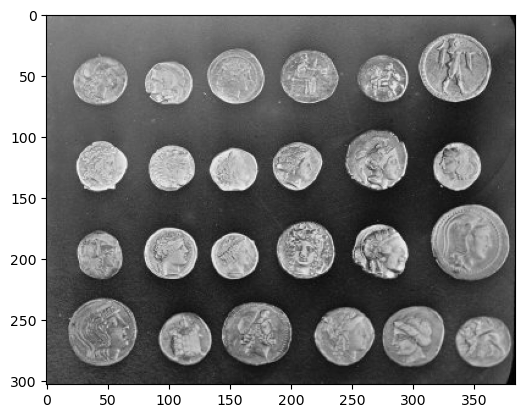

In [49]:
from skimage import data, feature, filters ,exposure, segmentation, color

image =  data.coins()
plt.imshow(image,cmap="gray")

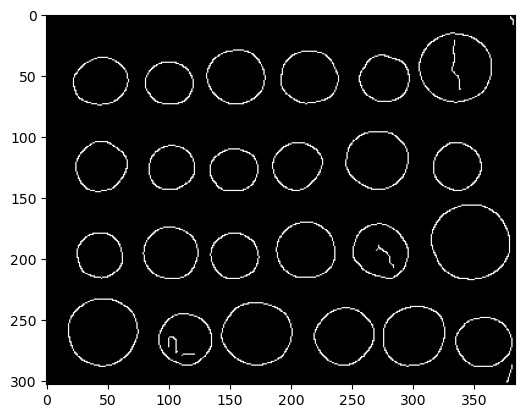

In [50]:
edges_canny = feature.canny(image, sigma=3)
plt.imshow(edges_canny,cmap="gray")


## 2- sobeledge detection


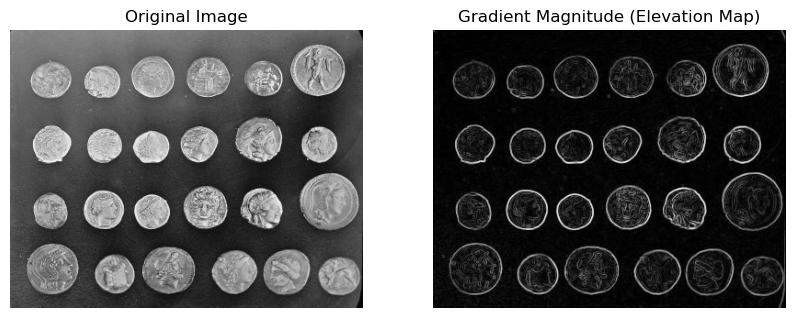

In [51]:

if image is None:
    raise FileNotFoundError(f"No image found at path: {image}")

# Apply the Sobel operator to get the gradients in the x and y directions
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Compute the gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize the result to the range [0, 255]
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)
gradient_magnitude = np.uint8(gradient_magnitude)

# Display the results
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gradient Magnitude (Elevation Map)')
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')

plt.show()


#### here is another way with only one line code 


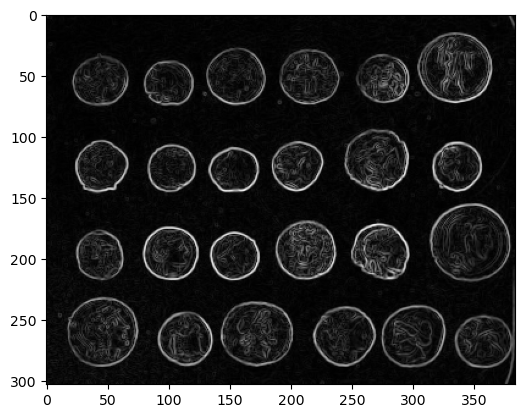

In [43]:

edges_sobel = filters.sobel(image)

plt.imshow(edges_sobel,cmap="gray")


# Region-based segmentation

In [45]:
from scipy import ndimage as ndi


In [54]:
image = (image * 255).astype(np.uint8)

# Apply thresholding
_, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Compute the distance transform
distance = cv2.distanceTransform(binary, cv2.DIST_L2, 5)

# Normalize the distance image for display
distance = cv2.normalize(distance, None, 0, 1.0, cv2.NORM_MINMAX)

# Threshold to get markers
_, markers = cv2.threshold((distance * 255).astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Perform connected component analysis
markers = morphology.label(markers)

# Apply the Watershed algorithm
labels = segmentation.watershed(-distance, markers, mask=binary)


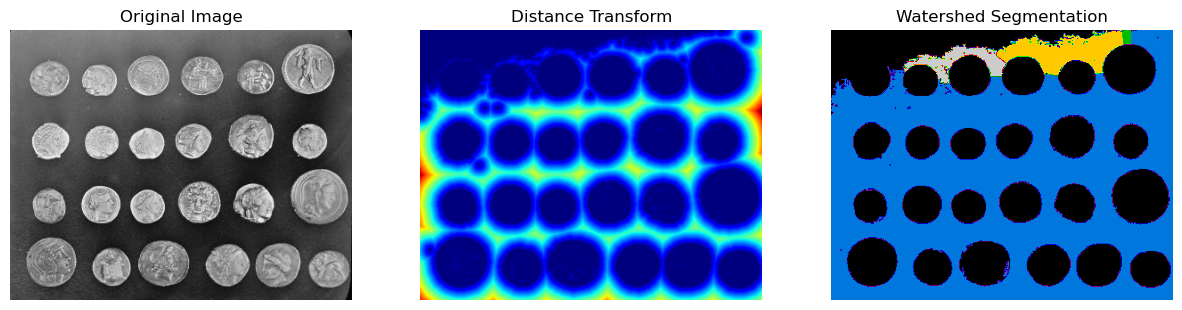

In [56]:
# Display the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(distance, cmap='jet')
ax[1].set_title('Distance Transform')
ax[1].axis('off')

ax[2].imshow(labels, cmap='nipy_spectral')
ax[2].set_title('Watershed Segmentation')
ax[2].axis('off')

plt.show()
